In [ ]:
!pip install tensorflow

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97749.3828 - val_loss: 95682.5156
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 96436.0156 - val_loss: 94135.6797
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 95312.1875 - val_loss: 90024.0625
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 88989.3359 - val_loss: 81767.1094
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 79697.5312 - val_loss: 68477.5938
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 64695.3789 - val_loss: 51023.4570
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 46167.5469 - val_loss: 32452.9258
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 27199.6562 - val_loss: 17126.1172
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 14235.3984 - val_loss: 8227.1895
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 6296.4316 - val_loss: 4763.8921
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 452

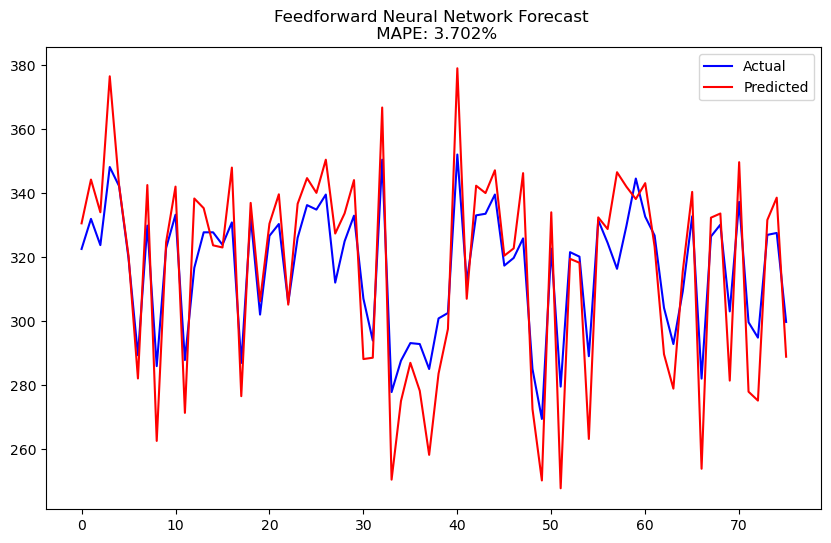

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error


# Load the data
df = pd.read_csv("ercot_power_data.csv")
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' column is datetime
df.set_index('date', inplace=True)  # Set 'date' as the index

# Create lagged features
def create_features(data, lag=3):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i + lag])  # Create sequences of 'lag' values
        y.append(data[i + lag])   # Target is the next value
    return np.array(X), np.array(y)

lag = 3
X, y = create_features(df["value"].values, lag=lag)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, lag)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, lag)).reshape(X_test.shape)

# Build a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(lag,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)

# Evaluate and predict
y_pred = model.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100  # Calculate MAPE

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='Blue')
plt.plot(range(len(y_pred)), y_pred.flatten(), label='Predicted', color='Red')
plt.title(f'Feedforward Neural Network Forecast \n MAPE: {mape:.3f}%')
plt.legend()
plt.savefig("NN_forecast.png")
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98126.3047 - val_loss: 95452.1875
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 95232.0781 - val_loss: 90489.0312
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 88497.6953 - val_loss: 68441.0547
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 57437.5781 - val_loss: 20050.5508
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 11448.2119 - val_loss: 900.7145
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 1464.6281 - val_loss: 824.7081
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 1024.9694 - val_loss: 722.4482
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 1016.3517 - val_loss: 646.9646
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 914.9221 - val_loss: 581.8025
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 842.6187 - val_loss: 505.5235
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 719.7114 - val_loss

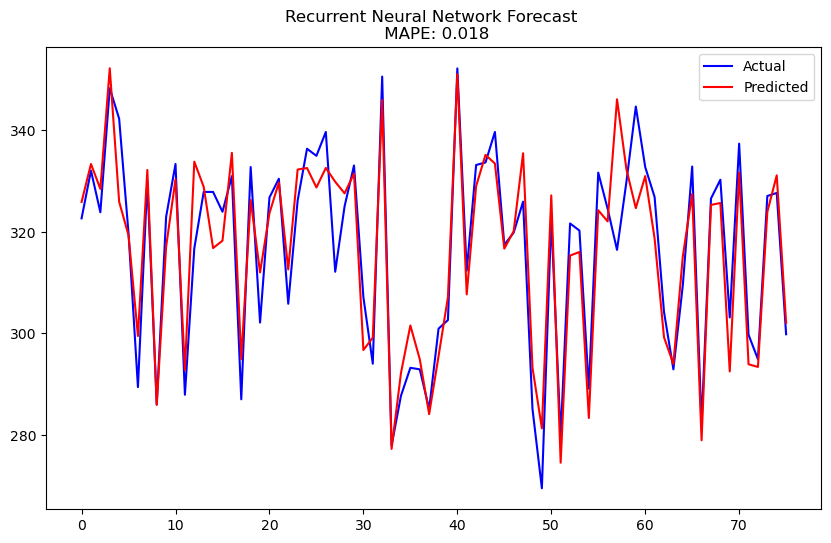

In [9]:
from tensorflow.keras.layers import SimpleRNN

# Build an RNN model
model = tf.keras.Sequential([
    SimpleRNN(50, activation='relu', input_shape=(lag, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Reshape input for RNN (samples, timesteps, features)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_rnn, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)

# Predict
y_pred_rnn = model.predict(X_test_rnn)
mape = mean_absolute_percentage_error(y_test, y_pred_rnn)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='Blue')
plt.plot(y_pred_rnn, label='Predicted', color='Red')
plt.title(f'Recurrent Neural Network Forecast \n MAPE: {mape:.3f}')
plt.legend()
plt.savefig("RNN_forecast.png")
plt.show()



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97709.5703 - val_loss: 96135.1484
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 98846.5938 - val_loss: 95599.1484
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 98205.6719 - val_loss: 91959.4531
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 89260.9453 - val_loss: 69681.4844
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 59327.9922 - val_loss: 22798.1406
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 14066.7402 - val_loss: 3315.1956
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 4399.3696 - val_loss: 3013.8628
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 3608.6287 - val_loss: 2651.6829
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 3558.5559 - val_loss: 2326.3616
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 3043.4744 - val_loss: 2043.4351
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 2512.5955

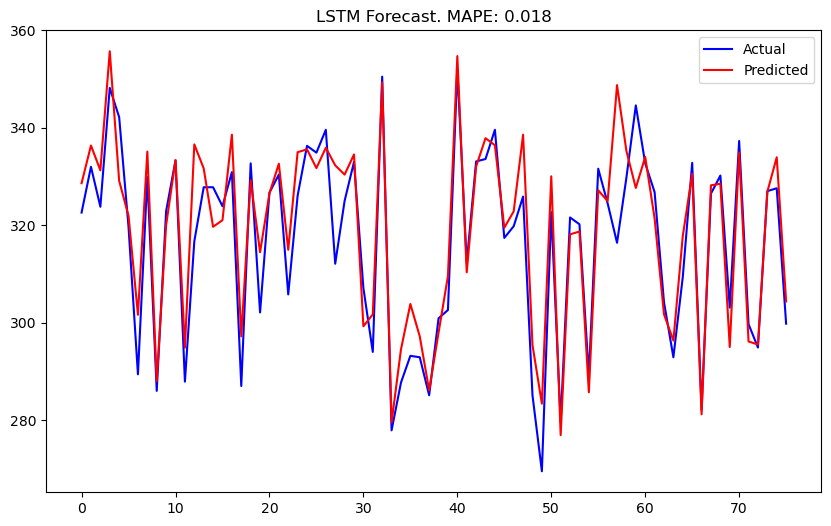

In [10]:
from tensorflow.keras.layers import LSTM

# Build an LSTM model
model = tf.keras.Sequential([
    LSTM(50, activation='relu', input_shape=(lag, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
model.fit(X_train_rnn, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)

# Predict
y_pred_lstm = model.predict(X_test_rnn)
mape = mean_absolute_percentage_error(y_test, y_pred_lstm)
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='Blue')
plt.plot(y_pred_lstm, label='Predicted', color='Red')
plt.title(f'LSTM Forecast. MAPE: {mape:.3f}')
plt.legend()
plt.savefig("LSTM_forecast.png")
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [380, 76]